# (test) Regress percentage of test takers in the paper

We will use points obtained from the Article to create a model that predicts your chance of sitting for the SHSAT based on your Math test score (apparently done after the SHSAT).

*the test scores are measured in standard deviations*

In [1]:
import pandas as pd

points = pd.read_csv('../data/keep/percent-applicants-by-math-grade.csv', header=None)
points.head()

,0,1
0,-2.662791,2.530815
1,-2.447674,2.555216
2,-2.226744,1.918274
3,-2.017442,1.560510
4,-1.773256,2.618911


In [2]:
points.max()

grades_zscore = points[0]
chance_of_applying = points[1] / 100.0

In [3]:
import matplotlib.pyplot as plt

plt.plot(grades_zscore, chance_of_applying, '-')

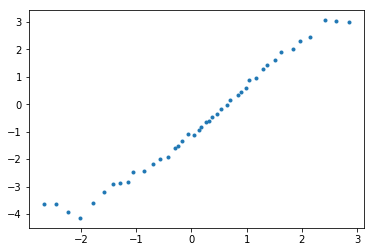

In [4]:
# it looks like it can be regressed using the logit transformation

# test this
from scipy.special import logit

ys = logit(chance_of_applying)

plt.plot(grades_zscore, ys, '.')  # two weird tails

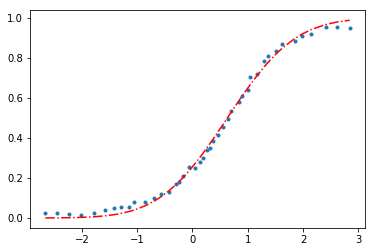

In [5]:
# okay... what about a gaussian CDF

from scipy.optimize import curve_fit
from scipy.stats import norm

xs = grades_zscore
ys = chance_of_applying
def cdf(x, mean, std):
    return norm.cdf(x, mean, std)
popt, pcov = curve_fit(cdf, xs, ys)

plt.plot(xs, ys, '.')

xs = grades_zscore
ys = cdf(xs, *popt)
plt.plot(xs, ys, 'r-.')  # nice and fit... let's compare with logit regression

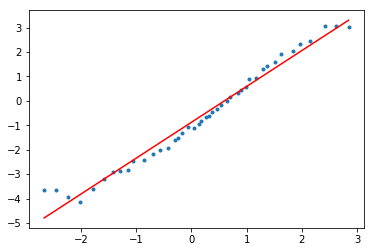

In [6]:
from scipy.special import logit, expit

xs = grades_zscore
ys = logit(chance_of_applying)

plt.plot(grades_zscore, ys, '.')  # two weird tails

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xs.to_frame(), ys)
ys_pred = model.predict(xs.to_frame())

plt.plot(xs, ys_pred, 'r-')

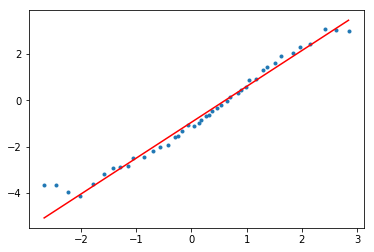

In [7]:
# using a robust model

from scipy.special import logit, expit

xs = grades_zscore
ys = logit(chance_of_applying)

plt.plot(grades_zscore, ys, '.')  # two weird tails

from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(xs.to_frame(), ys)
ys_pred = model.predict(xs.to_frame())

plt.plot(xs, ys_pred, 'r-')  # better

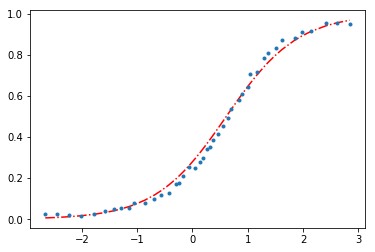

In [8]:
# visualizing results above as percentage

xs = grades_zscore
ys = expit(ys_pred)
plt.plot(xs, ys, 'r-.')

xs = grades_zscore
ys = chance_of_applying
plt.plot(xs, ys, '.')

One model is better in the middle, the other is better on the tails. Can we average them?